<h1>Model Initialization</h1>
<h3>
    <ol>
        <li>
            Accessing Processed Data and Loading into a Pandas DataFrame
        </li>
        <li>
            Splitting the Combined DataFrame by Article Type
        </li>
        <li>
            Splitting the Dataset into Training Data and Test Data
        </li>
        <li>
            Creating Bag of Words Models
        </li>
        <li>
            Extracting Common Words Occuring in Both the Science and Conspiracy Data
        </li>
        <li>
            Extracting The Most Relevant Words from the Common Words
        </li>
        <li>
            Building the Training and Test DataFrame
        </li>
        <li>
            Serializing the Training and Testing DataFrames for Further Use
        </li>
    </ol>
</h3>

***

<h4>Accessing Processed Data and Loading into a Pandas DataFrame</h4>

In [17]:
import pandas as pd

# accessing stored processed data in JSON format
df = pd.read_json('../Data/processed/processed_data.json', orient='records')

In [18]:
df

,title,link,text,article_type
0,Quercetin for Seasonal Allergies? A recent stu...,https://www.consumerlab.com/reviews/quercetin-...,Save to favorites This feature is restricted t...,1
1,How Many Times Should You Test for COVID? It m...,https://www.consumerlab.com/answers/how-and-wh...,"Answer: Before we get into specifics, let's st...",1
2,08/08/2022 Woman Pleads Guilty for Selling and...,https://www.consumerlab.com/recalls/14684/woma...,"On July 27, 2022, Diana Daffin, owner of Savvy...",1
3,08/08/2022 Seller of CBD Warned for COVID-19 C...,https://www.consumerlab.com/recalls/14683/sell...,"On August 4, 2022, the FDA sent a warning lett...",1
4,Product Reviews and Answers to Questions About...,https://www.consumerlab.com/topic/coronavirus/,Save to favorites This feature is restricted t...,1
...,...,...,...,...
475,Most people infected with Omicron weren't even...,https://www.sott.net/article/471164-Most-peopl...,The lack of public awareness about being infec...,0
476,"Zoonotic Langya virus found in China, CDC says",https://www.sott.net/article/470863-Zoonotic-L...,© Daily PRABHAT/simplifay The 26 patients deve...,0
477,CDC quietly removes 'claim' that spike protein...,https://www.sott.net/article/471150-CDC-quietl...,The mRNA vaccines cannot give you COVID-19. Th...,0
478,9/11 vs. COVID: The Sorry Tale of a Nation Gon...,https://www.veteranstoday.com/2022/08/12/9-11-...,By John Kaminski What goes around comes around...,0


<h4>Splitting the Combined DataFrame by Article Type<h4>

In [19]:
# splitting the dataframe into two parts based on scientific/conspiracy lines to build two bag-of-words

scientific_articles = df.loc[df['article_type'] == 1]
conspiracy_articles = df.loc[df['article_type'] == 0]

In [20]:
scientific_articles

,title,link,text,article_type
0,Quercetin for Seasonal Allergies? A recent stu...,https://www.consumerlab.com/reviews/quercetin-...,Save to favorites This feature is restricted t...,1
1,How Many Times Should You Test for COVID? It m...,https://www.consumerlab.com/answers/how-and-wh...,"Answer: Before we get into specifics, let's st...",1
2,08/08/2022 Woman Pleads Guilty for Selling and...,https://www.consumerlab.com/recalls/14684/woma...,"On July 27, 2022, Diana Daffin, owner of Savvy...",1
3,08/08/2022 Seller of CBD Warned for COVID-19 C...,https://www.consumerlab.com/recalls/14683/sell...,"On August 4, 2022, the FDA sent a warning lett...",1
4,Product Reviews and Answers to Questions About...,https://www.consumerlab.com/topic/coronavirus/,Save to favorites This feature is restricted t...,1
...,...,...,...,...
265,David Oliver: The overwhelming reaction to my ...,https://www.bmj.com/content/378/bmj.o2017,"David Oliver , consultant in geriatrics and ac...",1
266,Investigating the monkeypox outbreak,https://www.bmj.com/content/377/bmj.o1314,"Christopher Dye , professor of epidemiology , ...",1
267,Monkeypox: what we know about the 2022 outbrea...,https://www.bmj.com/content/378/bmj.o2058,Mun-Keat Looi The BMJ With WHO declaring monke...,1
268,Risk of preterm birth and stillbirth after cov...,https://www.bmj.com/content/378/bmj-2022-071416,Conclusion The findings suggest that vaccinati...,1


In [21]:
conspiracy_articles

,title,link,text,article_type
270,Fauci to Step Down in December Will He Be Held...,https://www.sgtreport.com/2022/08/fauci-to-ste...,"by Brownstone Institute, via Childrens Health ...",0
271,the Covid-19 Pandemic: Excess Deaths Is the Be...,https://americanfreepress.net/judging-the-covi...,"By Dr. Kevin Barrett The American people, pola...",0
272,Is the COVID-19 Vaccine a Miracle?,https://biologos.org/post/is-the-covid-19-vacc...,Dictionary definitions change over time in res...,0
273,Is the COVID-19 vaccine safe?,https://biologos.org/resources/is-the-covid-19...,The vaccine is the key to our global recovery ...,0
274,A Christian Statement on Science for Pandemic ...,https://biologos.org/post/a-christian-statemen...,BioLogos has invited dozens of Christian leade...,0
...,...,...,...,...
475,Most people infected with Omicron weren't even...,https://www.sott.net/article/471164-Most-peopl...,The lack of public awareness about being infec...,0
476,"Zoonotic Langya virus found in China, CDC says",https://www.sott.net/article/470863-Zoonotic-L...,© Daily PRABHAT/simplifay The 26 patients deve...,0
477,CDC quietly removes 'claim' that spike protein...,https://www.sott.net/article/471150-CDC-quietl...,The mRNA vaccines cannot give you COVID-19. Th...,0
478,9/11 vs. COVID: The Sorry Tale of a Nation Gon...,https://www.veteranstoday.com/2022/08/12/9-11-...,By John Kaminski What goes around comes around...,0


<h4>Splitting the Dataset into Training Data and Test Data</h4>

In [22]:
# splitting articles between training and test sets twice, once for the scientific ones and once for the conspiracy ones

from sklearn.model_selection import train_test_split

training_science_set, test_science_set = train_test_split(scientific_articles, test_size = 0.2, random_state = 1)

training_conspiracy_set, test_conspiracy_set = train_test_split(conspiracy_articles, test_size = 0.2, random_state = 1)

In [23]:
training_science_set

,title,link,text,article_type
123,coronavirus vaccine,https://www.hopkinsmedicine.org/search?q=coron...,COVID-19 Vaccine: What You Need to Know - Hopk...,1
256,Prognosis and persistence of smell and taste d...,https://www.bmj.com/content/378/bmj-2021-069503,Smell and taste disorders tended to be overloo...,1
258,US CDC announces major changes after criticism...,https://www.bmj.com/content/378/bmj.o2074,Janice Hopkins Tanne New York The US national ...,1
31,Doomscrolling COVID-19 News Takes an Emotional...,https://scienceblogs.com/sb-admin/2021/10/22/d...,"Picture this: it’s April 2020, you’re between ...",1
18,Polio was found in New York City wastewater. S...,https://geneticliteracyproject.org/2022/08/23/...,It’s easy to feel a bit of panic in the air. A...,1
...,...,...,...,...
203,Heat waves,https://watchers.news/category/earth-changes/h...,The second heatwave to hit Europe since mid-Ju...,1
255,"Re: Risk of preterm birth, small for gestation...",https://www.bmj.com/content/378/bmj-2022-07141...,,1
72,ponders society relationship with viruses,https://www.sciencenews.org/article/virology-b...,"Virology Joseph Osmundson W.W. Norton & Co., $...",1
235,CDC ResponseLearn how CDC is responding to COV...,https://www.cdc.gov/coronavirus/2019-ncov/comm...,UPDATE The White House announced that vaccines...,1


In [24]:
training_conspiracy_set

,title,link,text,article_type
376,Pandemic of Propaganda – The Unvaccinated Are ...,https://oye.news/news/psychological/propaganda...,I’ve added the dynamic graph using the embed c...,0
421,White House Orders 171 Million Doses of “New” ...,https://vaccineimpact.com/2022/white-house-ord...,"by Brian Shilhavy Editor, Health Impact News T...",0
364,California Police Depts Refuse to Enforce News...,https://thefreethoughtproject.com/be-the-chang...,"Last month, California Governor Gavin Newsom m...",0
354,Watch: Cop Accuses Frontline COVID Worker of \...,https://thefreethoughtproject.com/police-bruta...,"Ulster County, NY — Shana Shaw, 26, is a nurse...",0
463,"10,000% Increase in Cancers Following COVID-19...",https://healthimpactnews.com/2022/10000-increa...,"by Brian Shilhavy Editor, Health Impact News R...",0
...,...,...,...,...
473,Most people infected with Omicron weren't even...,https://www.sott.net/article/471164-Most-peopl...,The lack of public awareness about being infec...,0
407,COVID vaccination and turbo cancer: pathologic...,https://doctors4covidethics.org/covid-vaccinat...,"In this video (26 min, Swedish with English su...",0
342,Journal Article Questioning COVID Vaccination ...,https://thevaccinereaction.org/2021/07/journal...,A scholarly article published in a medical jou...,0
410,with Professor Hannah Fry The BBC Pandemic Par...,https://iaindavis.com/propaganda-fry-part-3/,In Part 1 we looked at the propaganda and mani...,0


In [25]:
len(training_science_set + training_conspiracy_set)

384

In [26]:
len(test_science_set + test_conspiracy_set)

96

<h4>Creating Bag of Words Models</h4>

In [27]:
from bag_of_words import BagOfWords

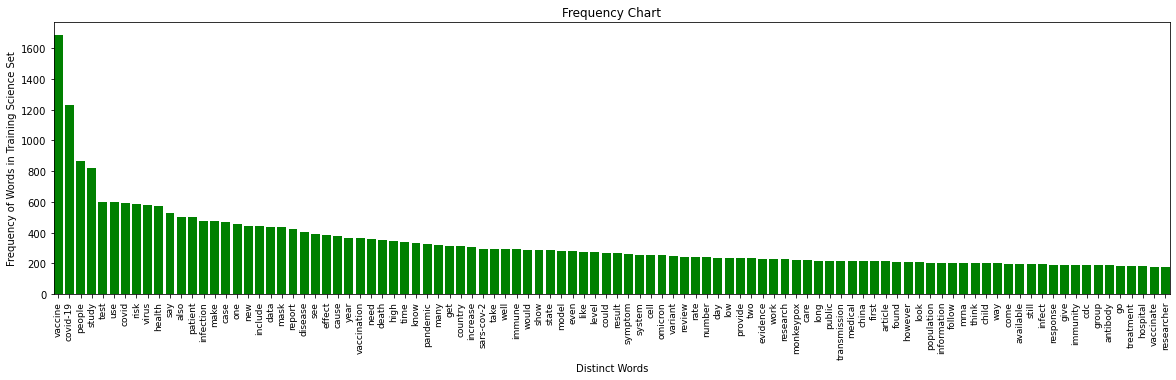

In [28]:
# creating an instance of the BagOfWords class for the scientific articles training set
science_train = BagOfWords(training_science_set, "Training Science Set")

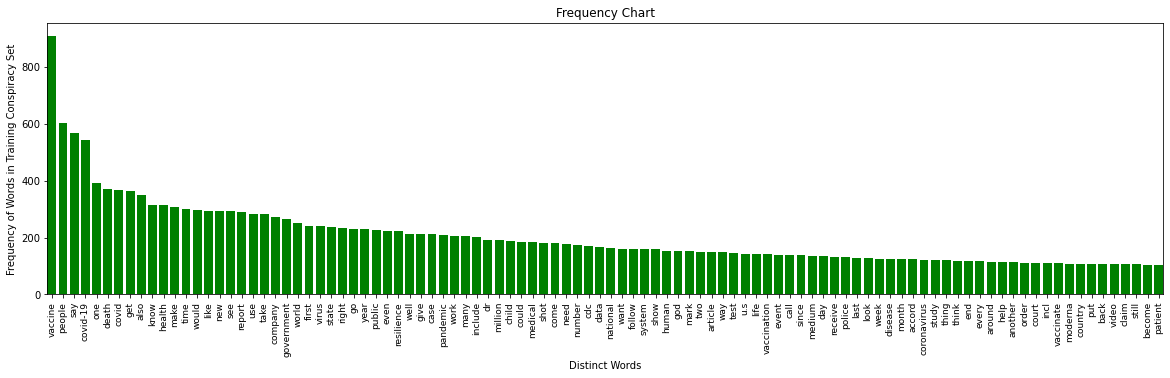

In [29]:
# creating an instance of the BagOfWords class for the conspiracy articles training set
conspiracy_train = BagOfWords(training_conspiracy_set, "Training Conspiracy Set")

<h4>Extracting Common Words Occuring in Both the Science and Conspiracy Data</h4>

In [30]:
# determining the common words between two BagOfWords models
def get_common_words(a: BagOfWords, b: BagOfWords, min_occur: int = 5) -> dict:
    # determine the common words between the two sets of words
    common_words = dict()

    # loop over the words in a's vocabulary
    for word, count in a.freq_chart.items():

        # check if the word exists in b
        if word in b.freq_chart:

            # enforce minimum count necessary for a relative frequency to be calculated
            if min(count, b.freq_chart[word]) <= min_occur:
                continue

            # determine the difference in count between the two (scientific - conspiracy)
            diff_count = count - b.freq_chart[word]

            # saving the final adjusted frequency in common_words
            common_words[word] = diff_count/(count + b.freq_chart[word])

    # remove all with relative frequency = 0 
    common_words = dict(filter(lambda elem: elem[1] != 0, common_words.items()))

    # sorting the dictionary in descending order
    sorted_common_list = sorted(common_words, key=common_words.get, reverse=True)
    common_words = {word: common_words[word] for word in sorted_common_list}

    return common_words

In [31]:
# calling get_common_words() to obtain the common words amonst the two training sets
common_words = get_common_words(science_train, conspiracy_train)

In [32]:
common_words

{'bias': 0.8878504672897196,
 'antibody': 0.8793969849246231,
 'admission': 0.875,
 'participant': 0.8742857142857143,
 'sample': 0.8705035971223022,
 'surge': 0.8679245283018868,
 'argument': 0.8461538461538461,
 'difference': 0.8163265306122449,
 'factor': 0.8151260504201681,
 'low': 0.813953488372093,
 'pregnancy': 0.8021978021978022,
 'immunity': 0.7990430622009569,
 'quality': 0.7931034482758621,
 'analysis': 0.7887323943661971,
 'outcome': 0.7887323943661971,
 'hiv': 0.7857142857142857,
 'loss': 0.7846153846153846,
 'physician': 0.7831325301204819,
 'feature': 0.7735849056603774,
 'table': 0.7714285714285715,
 'risk': 0.770392749244713,
 'coverage': 0.7692307692307693,
 'letter': 0.7684210526315789,
 'strategy': 0.7657657657657657,
 'stress': 0.7647058823529411,
 'primary': 0.7627118644067796,
 'incidence': 0.7627118644067796,
 'extremely': 0.7627118644067796,
 'additional': 0.7619047619047619,
 'variant': 0.7597173144876325,
 'delta': 0.7580645161290323,
 'pot': 0.75510204081632

In [55]:
# determining the number of chosen words that are positive and negative, is useful in observing if there is an imbalance in the vocabulary of either

positive_count = sum(y > 0 for _, y in common_words.items())
negative_count = sum(y < 0 for _, y in common_words.items())

In [35]:
print(len(common_words), "common words overall")
print("of these, positively-ranked count: ", positive_count, ", negatively-ranked count: ", negative_count, sep='')

1580 common words overall
of these, positively-ranked count: 1051, negatively-ranked count: 472


<h4>Extracting The Most Relevant Words from the Common Words</h4>

In [36]:
# out of all of the common words, extracts a certain number with the highest magnitude
def get_relevant_words(common_words: dict, num_words: int = 500) -> list:
    # creating a list to store sorted words
    sorted_words = []

    # ensure that number of words chosen is within appropriate size bounds
    num_words = min(num_words, len(common_words.items()))

    # disregard signs when considering the magnitudes to sort by 
    for key, value in common_words.items():
        sorted_words.append([abs(value), key])

    # sort these words in reverse order to select the most relevant of them
    sorted_words.sort(reverse=True)

    # take num_words of the words with the highest magnitudes
    relevant_words = sorted_words[:num_words]

    # return the sign back to the word
    for word in relevant_words:
        word[0] = common_words[word[1]]

    # sort the words again before returning
    relevant_words.sort()

    return [e[1] for e in relevant_words]

In [37]:
# calling get_relevant_words() to obtain the most relevant words

train_relevant_words = get_relevant_words(common_words, 40)

In [53]:
# storing points to plot in two lists
x_axis, y_axis = [], []

# looping over relevant words
for word in train_relevant_words:
    # adding current word to x_axis for plotting
    x_axis.append(word)

    # adding the word's relevance to the y_axis
    y_axis.append(common_words[word])

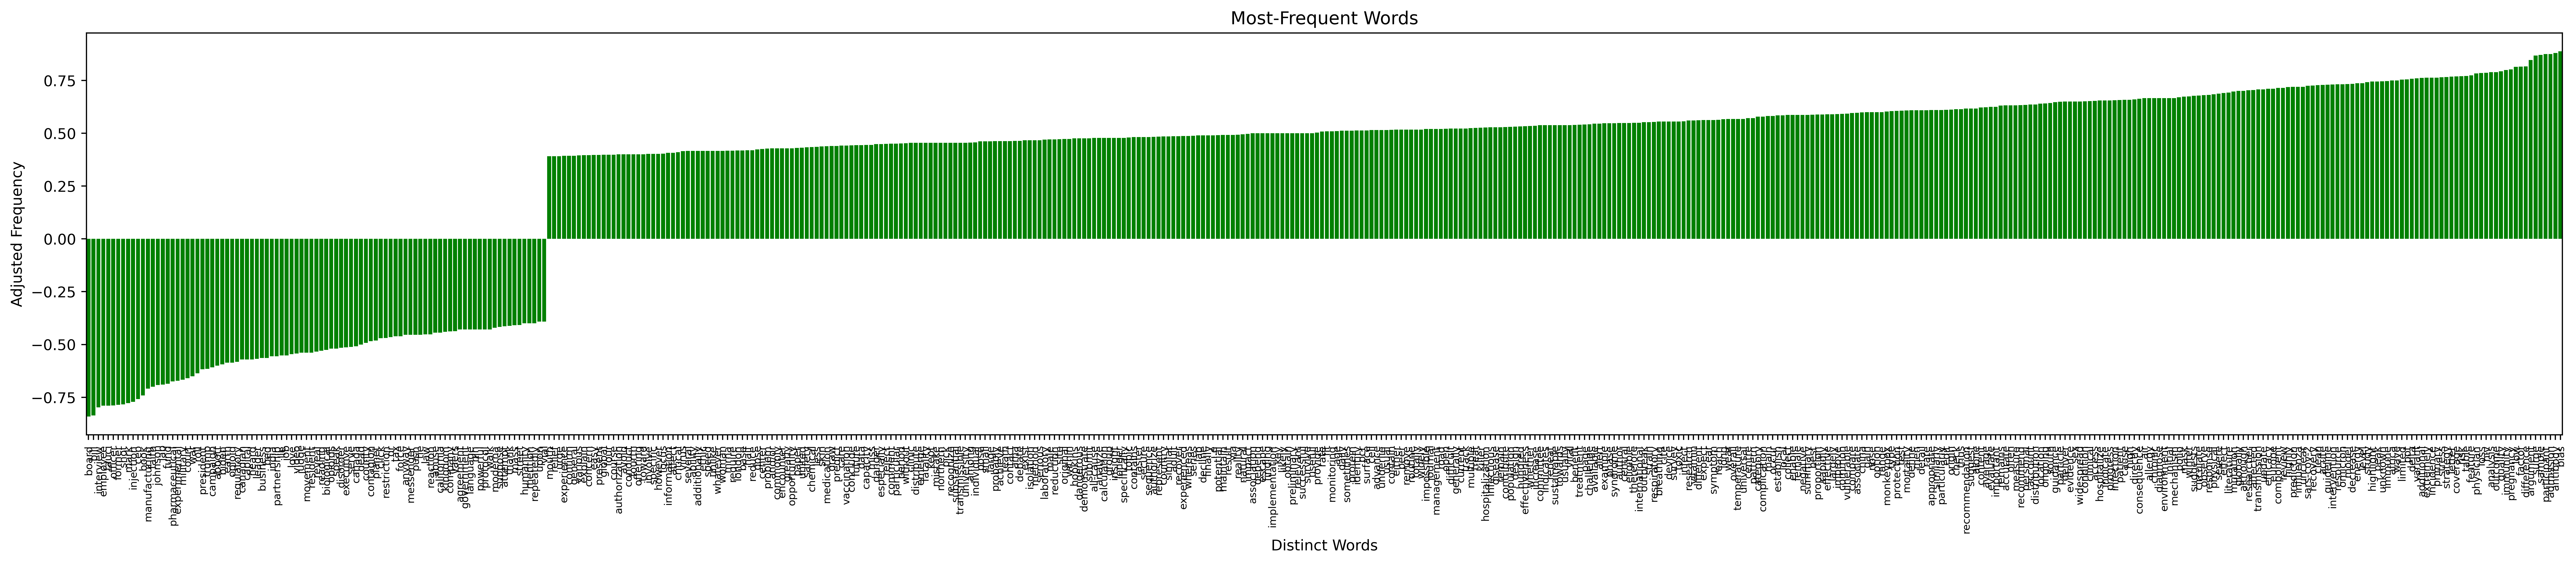

In [57]:
# plot a graph showing positive and negative relevances

import matplotlib.pyplot as plt

# modifying the settings for the plot
plt.figure(figsize=(30, 5), dpi=500)
plt.margins(x=0, tight=True)
plt.bar(x_axis, y_axis, color='green')
plt.tick_params(axis='x', which='major', labelsize=7)
plt.xticks(rotation = 90)

# setting title and labels
plt.xlabel("Distinct Words")
plt.ylabel("Adjusted Frequency")
plt.title("Most-Frequent Words")

# loading the plot
plt.show()

In [38]:
train_relevant_words

['board',
 'bill',
 'interview',
 'employee',
 'fauci',
 'officer',
 'former',
 'shot',
 'mark',
 'injection',
 'ceo',
 'book',
 'manufacturing',
 'faith',
 'johnson',
 'jab',
 'fund',
 'pharmaceutical',
 'experimental',
 'military',
 'court',
 'war',
 'roll',
 'president',
 'trump',
 'campaign',
 'abbott',
 'biden',
 'earth',
 'opioid',
 'regulatory',
 'canadian',
 'capital',
 'heard',
 'leader',
 'business',
 'bed',
 'india',
 'partnership',
 'lie',
 'job',
 'love',
 'video',
 'judge',
 'movement',
 'resident',
 'reveal',
 'reading',
 'biological',
 'opioids',
 'speak',
 'disorder',
 'executive',
 'serve',
 'canada',
 'dead',
 'county',
 'contagion',
 'planet',
 'click',
 'restriction',
 'dr',
 'tax',
 'force',
 'anyway',
 'messenger',
 'push',
 'tie',
 'law',
 'reaction',
 'abuse',
 'california',
 'kingdom',
 'company',
 'vaers',
 'agreement',
 'government',
 'language',
 'nih',
 'powerful',
 'protocol',
 'walk',
 'moderna',
 'suppose',
 'attempt',
 'thank',
 'mass',
 'street',
 'hu

<h4>Building the Training and Test DataFrame</h4>

In [39]:
import pandas as pd
import numpy as np

# building a training dataframe
def build_training_dataframe(relevant_words: list) -> pd.DataFrame:
    # creating a dictionary to store the columns of the to-be-created dataframe
    cols = {}

    # looping over words to add new columns
    for word in relevant_words:
        cols[word] = []

    # loop over articles in the in the training scientific set
    for article in training_science_set['text'].tolist():
        # create a BagOfWords to get a reliable vocabulary
        current_article = BagOfWords(article, None)

        # loop over the words associated with the columns
        for word in cols:
            # adding the count of that specific words in the current article
            cols[word].append(current_article.freq_chart[word] if word in current_article.freq_chart else 0)

    # loop over articles in the in the training conspiracy set
    for article in training_conspiracy_set['text'].tolist():
        # create a BagOfWords to get a reliable vocabulary
        current_article = BagOfWords(article, None)

        for word in cols:
            # adding the count of that specific words in the current article
            cols[word].append(current_article.freq_chart[word] if word in current_article.freq_chart else 0)

    # creating a pandas dataframe from dataset
    data_set = pd.DataFrame(data = cols)

    row_count = data_set.shape[0]/2

    # setting scientific articles to 1
    data_set.loc[:row_count,'article_type'] = 1

    # setting conspiracy articles to 0
    data_set.loc[row_count:, 'article_type'] = 0

    return data_set

In [40]:
# it is repeating articles at the moment for some reason
train_data = build_training_dataframe(train_relevant_words)

In [41]:
def build_test_dataframe(train_relevant_words: str) -> pd.DataFrame:
    # creating a dictionary to store the columns of the to-be-created dataframe
    cols = {}

    # looping over words to add new columns
    for word in train_relevant_words:
        cols[word] = []

    # loop over articles in the in the test scientific set
    for article in test_science_set['text'].tolist():
        # create a BagOfWords to get a reliable vocabulary
        current_article = BagOfWords(article, None)

        # loop over the words associated with the columns
        for word in cols:
            # adding the count of that specific words in the current article
            cols[word].append(current_article.freq_chart[word] if word in current_article.freq_chart else 0)

    # loop over articles in the in the test conspiracy set
    for article in test_conspiracy_set['text'].tolist():
        # create a BagOfWords to get a reliable vocabulary
        current_article = BagOfWords(article, None)

        for word in cols:
            # adding the count of that specific words in the current article
            cols[word].append(current_article.freq_chart[word] if word in current_article.freq_chart else 0)

    # creating a pandas dataframe from dataset
    data_set = pd.DataFrame(data = cols)

    row_count = data_set.shape[0]/2

    # setting scientific articles to 1
    data_set.loc[:row_count,'article_type'] = 1

    # setting conspiracy articles to 0
    data_set.loc[row_count:, 'article_type'] = 0

    return data_set

In [42]:
test_data = build_test_dataframe(train_relevant_words)

In [43]:
train_data.columns

Index(['board', 'bill', 'interview', 'employee', 'fauci', 'officer', 'former',
       'shot', 'mark', 'injection',
       ...
       'factor', 'difference', 'argument', 'surge', 'sample', 'participant',
       'admission', 'antibody', 'bias', 'article_type'],
      dtype='object', length=501)

In [47]:
train_data.shape

(384, 501)

In [45]:
test_data.shape

(96, 501)

<h4>Serializing the Training and Testing DataFrames for Further Use</h4>

In [51]:
train_data.to_pickle('../Data/model/train_data.pkl')

In [52]:
test_data.to_pickle('../Data/model/test_data.pkl')

In [60]:
import json

with open('../Data/model/relevant_words.json', 'w') as f:
    json.dump(train_relevant_words, f, indent=4)